## 15-1. 들어가며


![content img](https://d3s0tskafalll9.cloudfront.net/media/images/so-1-l-0-1.max-800x600.jpg)

\[쏘카존\]

[https://blog.socar.kr/10376](https://blog.socar.kr/10376)


### 쏘카를 이용하고 차량을 반납해요!

___

쏘카는 전국 어디서든 부담 없이 차량을 이용할 수 있도록 차량 대여 서비스를 하고 있습니다. 차량을 대여한 사용자는 필요한 만큼 원하는 차량을 제공받을 수 있어서 많은 사랑을 받고 있지요~!

대여 서비스인 쏘카가 지속적으로 서비스를 제공하기 위해서는 사용하는 사람의 차량 반납 또한 중요합니다. 대여된 차량이 제대로 반납되어야 다음 대여가 이루어질 수 있기 때문입니다.

쏘카에는 쏘카존이 있습니다. 쏘카존에 가면 대여 가능한 쏘카가 있기 때문에 이용자들이 편리하게 이용할 수 있죠. 쏘카의 반납도 쏘카존을 통해 이루어집니다. 그래서 쏘카존에서 대여한 차량은 대여하였던 바로 그 쏘카존으로 반납되어야 해요.

-   [4천개의 쏘카존을 움직이는 사람들](https://blog.socar.kr/10367)
-   [쏘카존 개설 신청](https://docs.google.com/forms/d/e/1FAIpQLSfMSO1_xwgsAfCgUyneWz-IcrTv7I1C8Pv2-vXyZMlDzvlUjg/viewform)

그런데 쏘카존은 4천여 곳이 있습니다. 쏘카존에서 일어나는 대여와 반납을 하나하나 관리한다면 어떻게 될까요? 쏘카는 "야근+출장"이 끊이지 않는 회사가 되어 버릴지도 모릅니다. 😱

여기서 인공지능이 필요하다고 느끼셨다면 아주 좋은 접근이에요. 쏘카에서도 노력 중이거든요!! 쏘카에서는 이를 **정위치 주차 여부 판단 문제**라고 부르며 해결하고자 하고 있습니다.

이번 노드에서는 쏘카가 정위치 주차 여부 판단 문제를 해결하는 과정을 탐험하면서 분류 문제의 새로운 지평을 소개합니다~!

### 학습 목표

___

-   정위치 주차 여부 판단 문제를 어떤 task로 볼 수 있을지 알아본다.
-   정위치 주차 여부 판단 문제를 분류 문제 모델로 해결해 보고, 그 결과를 분석해 본다.
-   Open Set Recognition의 기본 개념을 이해한다.

### 학습 목차

___

1.  정위치 주차 여부 판단
2.  어떻게 해결해야 할까?
3.  데이터 준비
4.  모델 훈련
5.  Confidence
6.  Open Set Recognition

### 준비물

___

폴더를 생성하고 준비된 데이터를 연결해 주세요.

```
$ mkdir -p ~/aiffel/socar_open_set/data
$ mkdir -p ~/aiffel/socar_open_set/weights
$ ln -s ~/data/data/* ~/aiffel/socar_open_set/data
$ ln -s ~/data/weights/* ~/aiffel/socar_open_set/weights
```


## 15-2. 정위치 주차여부 판단

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/so-6-l-0-1.max-800x600.png)

### 정위치 주차

___

쏘카는 기본적으로 차량을 빌린 쏘카존에 반납하는 것을 원칙으로 하고 있습니다. 즉 이용이 끝난 후에 쏘카존에 제대로 주차해야 한다는 것이죠. 이때 몇몇 사용자가 이상한 위치에 주차하는 경우들이 발생합니다.

-   쏘카존 내 다른 주차 위치에 주차하는 경우
-   쏘카존 내 다른 층에 주차하는 경우
-   쏘카존 외 다른 구역에 주차하는 경우

이러한 경우에는 고객에게 정위치 주차를 요청하거나, 운영팀이 가서 정위치로 원상복구 할 수 있도록 차량이 이상한 위치에 주차가 되었는지를 판단할 수 있어야 합니다. 쏘카에서는 이 문제를 **정위치 주차 여부 판단 문제**라고 부르고 있습니다.

> 용어 정의
> 
> -   정위치 주차: 쏘카존 주차장 내 정확한 주차 위치에 쏘카를 주차한 경우
> -   오위치 주차: 쏘카존 주차장 내 정확하지 않은 주차 위치에 쏘카를 주차한 경우

### 어떤 데이터를 사용할까?

___

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/so-6-l-1-2.max-800x600.png)

쏘카는 10K 대 이상의 차량을 관리하고, 차량마다 블랙박스가 설치되어 있습니다. 이 블랙박스는 통신이 가능한 블랙박스로, 유저가 차량을 주차한 이후 이미지(=스냅샷)를 촬영하여 중앙 서버로 전송해 줍니다. 즉 고객이 차량 이용을 마치고 차량을 반납하면 자동으로 블랙박스가 스냅샷을 촬영하고, 이를 중앙 Database로 전송해 준다는 거죠.

> 1.  어떤 유저가 2. 언제 3. 어디에 주차했는지를 파악할 수 있는 데이터가 남게 됩니다!

블랙박스가 촬영한 이미지 예시는 아래와 같습니다

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/so-6-l-1-4.max-800x600.jpg)

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/so-6-l-1-3.max-800x600.jpg)

\[블랙박스에서 촬영한 이미지들\]

### 기술적 정의

___

정위치 주차 여부 판단 문제를 기술적으로 어떻게 정의할 수 있을까요?

**1\. 분류문제(Classification)**  
각 쏘카존의 정위치에서 촬영된 이미지를 Class로 구분하여, **Multi-class classification**으로 풀어볼 수 있습니다. 단, 이 경우 오위치에 주차된 이미지가 모델에 들어왔을 때 어떤 결과를 낼지 예상할 수 없습니다. 가장 암울하게는 정위치된 쏘카존이라고 판단해 버리는 것이죠!

**2\. 이상 탐지(Anomaly Detection)**  
가장 간단한 방법으로는, **각 쏘카존에 정위치 주차된 이미지 vs 정위치 이외에 다른 이미지**를 구분하는 **one vs all anomaly detection task**처럼 생각해서, classifier를 각 존마다 배포하는 방법이 있습니다. 단, 이 경우 각 쏘카존마다 anomaly detection을 수행하는 모델이 나와야 하는데 엔지니어링 관점에서 천개 단위의 쏘카존에 모두 모델을 배포하기에는 한계가 있습니다.

-   [분류모형](https://datascienceschool.net/03%20machine%20learning/09.03%20%EB%B6%84%EB%A5%98%EB%AA%A8%ED%98%95.html)
-   [이상 감지 - Anomaly Detection](https://intothedata.com/02.scholar_category/anomaly_detection/)

Q1. 위 링크에서 기계학습을 통한 이상 감지 모델의 실패 원인을 어떻게 설명하고 있나요?

예시답안

1.  이상하다고 규정할 사례가 매우 적다. 정답데이터셋(training set)의 참값을 가진 데이터(true set)이 매우 적거나 아예 존재하지 않는다.
2.  이상한 것이라고 사람이 지목한 것이 정상인것과 뚜렷하게 구분되지 않는다. 구분할 수 있는 명확한 변수(variable), 자질(feature)을 찾기 힘들다.
3.  어떤 상황 또는 데이터에 대해 정황상(경험상) 이상한 것이 맞다고 판단했으나 정량적으로 이를 판별할 관측데이터가 없거나 만들기 어렵다. 감지할 때 사용할 수 있는 변수(variable)나 자질(feature)로 사용할 데이터를 얻을 수 없으며 사후에 결과적으로 알아낼 수밖에 없다.

이상 탐지 방법을 활용하여 모델을 완성했다고 하더라도 엔지니어링 관점에서는 효율적이지 못합니다. 만약 모델을 만든다면 각 쏘카존마다 제대로 주차되었는지 여부를 판단할 수 있어야 합니다. \[쏘카존1:모델1\], \[쏘카존2:모델2\], \[쏘카존3:모델3\]... 이렇게 말이죠. 쏘카존이 1,000개로 늘어난다면 모델도 1,000개로 늘어나야 합니다. 이 경우 모델을 모두 관리할 수 없고, 제대로 동작하고 있는지 파악하기도 매우 어렵습니다. 모델을 관리하고 운영하는 엔지니어링 관점에서 어렵다는 것이죠.

## 15-3. 어떻게 해결해야 할까?

### 분류(Classification) 문제로 접근

___

앞에서 본 것과 같이 이상 탐지 방법으로는 해결이 어려워 보이니, 분류(classification) 문제로 접근해 보겠습니다.

우리가 가지고 있는 문제는 '오위치에 주차된 차량 스냅샷 이미지를 어떻게 걸러낼 것인가?'입니다. 오위치에 주차된 차량 스냅샷을 모두 구해서 학습시키면 될까요? Label 값으로 `쏘카존1`, `쏘카존2`, ... `쏘카존1000`, `오위치`를 정해놓고 오위치에 주차된 차량 스냅샷을 모두 `오위치`로 학습시키는 것이죠.

과연 오위치에 주차된 차량 스냅샷은 몇 가지 경우가 존재할까요? 셀 수나 있을까요?

정해진 쏘카존 외에는 모두 오위치이니 셀 수 없이 많을 거예요! 오위치 1억 개를 잡아낸다고 해도 1억 1번째 오위치가 다시 등장하겠죠. 단순한 분류 모델로는 해결되지 않을 것 같습니다.

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/so-6-l-2-4.max-800x600.png)

\[끝없이 나타나는 물음표의 향연\]

[https://arxiv.org/pdf/1904.01198.pdf](https://arxiv.org/pdf/1904.01198.pdf)


다른 방법을 생각해 봅시다.

### Confidence를 이용해보자

___

보통의 분류 문제에서는 최종 결과를 얻기 전에 softmax 값을 얻게 됩니다. 이 softmax 값을 토대로 최종 분류를 하게 되죠. 그렇다면 softmax 값이 높을 수록 확실히 구분 가능하다는 이야기일 것입니다. 그런데 Softmax 값이 높다는 것은 confidence가 높다는 말과 같습니다.

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/so-6-l-2-3.max-800x600.png)

\[마지막으로 나온 Softmax 값\]

[https://vitalflux.com/what-softmax-function-why-needed-machine-learning/](https://vitalflux.com/what-softmax-function-why-needed-machine-learning/)

Q2. 분류 문제에서 softmax 값을 토대로 최종 결과를 도출하게 되는데, 이때 softmax 값을 어떤 식으로 이용하나요?

예시답안

Softmax 값이 가장 큰 class로 분류한다.

다시 주차 문제로 돌아오면, 정위치에 주차된 차량 스냅샷 이미지들을 잘 구분하는 모델은 오위치에 주차된 차량 스냅샷 이미지에 비해 높은 confidence를 보일 것입니다. 즉 정위치에 주차된 차량의 이미지들을 학습하면서 충분히 정답을 맞추는 능력을 갖추었으니 높은 confidence를 달성하고, 오위치에 주차된 차량의 이미지들은 학습 단계에 포함되지 않아 모델이 이미지를 제대로 이해하지 못하고 있을 거예요. 이에 따라서 confidence가 낮지 않을까요?

이 아이디어를 직접 구현을 통해 검증해 봅시다!

### 어떤 것을 확인해야 할까요?

___

이제 이미지 분류 모델을 만들고 학습시킨 후, 정위치 데이터와 오위치 데이터에 대해 confidence가 어떤 차이를 보이는지 확인해 보려고 해요. 그렇다면 구체적으로 어떤 값을 확인해 봐야 할까요?

우선 softmax 값을 추출해 보면 좋을 것 같습니다. softmax 값이 1에 근접하다는 것은 확실한 분류가 가능하다는 이야기이니, softmax 값의 분포가 1에 몰려 있다면 confidence가 높다는 뜻일 테니까요.

Softmax 말고도 entropy를 확인해 보면 좋을 것 같습니다. 정보이론에서의 entropy에 관한 참고 자료를 차근차근 읽어봅시다.

-   [정보 엔트로피](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B3%B4_%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC)
-   [정보량과 엔트로피의 의미](https://bskyvision.com/389)
-   [정보 이론:Information Theory](https://brunch.co.kr/@chris-song/68)

Q3. 위 링크를 종합할 때 정보 이론에서 엔트로피와 confidence와의 관계는 어떻까요?

예시답안

엔트로피가 높을수록 confidence는 낮고, 엔트로피가 낮을수록 confidence가 높다.

위 퀴즈를 맞혔다면 준비가 된 것이니 다음으로 넘어갑시다!

# 15-4. 데이터 준비

이제 우리의 목표는 모델을 훈련시키고, 정위치 이미지와 오위치 이미지의 softmax 값과 entropy를 추출해 확인해 보는 것입니다! 목표가 확실해 졌다면 코드를 작성해 봅시다.

우리가 사용할 데이터의 폴더 구조는 이렇습니다.

```
socar_open_set
├──weights : 미리 훈련된 모델
└──data
    ├──train : 훈련용 정위치 이미지
    │  ├──atower_b5 
    │  ├──balsan_b5
    │  ├──balsan_b6
    │  └──dcube_b6
    ├──test : test용 정위치 이미지
    │  ├──atower_b5
    │  ├──balsan_b5
    │  ├──balsan_b6
    │  └──dcube_b6
    └──reject : 오위치 이미지
        └──images
```

`atower_b5`, `balsan_b5`와 같은 이름이 쏘카존 예시가 되겠네요.

### 쏘카의 주차 이미지

___

우선 프로젝트 진행을 위한 라이브러리를 불러옵니다.

In [2]:
import os
import numpy as np
from statistics import mean

import torch
import torchvision

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from scipy import stats

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

PROJECT_PATH = os.getenv('HOME') + '/aiffel/socar_open_set'
MODEL_PATH = os.path.join(PROJECT_PATH, 'weights')
DATA_PATH = os.path.join(PROJECT_PATH, 'data')
TRAIN_PATH = os.path.join(DATA_PATH, 'train')
TEST_PATH = os.path.join(DATA_PATH, 'test')
REJECT_PATH = os.path.join(DATA_PATH, 'reject')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device) # 여기서 'cuda'가 출력되어야 GPU와 연결이 됩니다

cuda


쏘카의 블랙박스에서 촬영된 정위치 이미지를 확인해 봅시다.

/aiffel/aiffel/socar_open_set/data/train/balsan_b6/20190104-08h17m55s_F_N.mp4_frame41.jpg
size: (1920, 1080, ('R', 'G', 'B'))


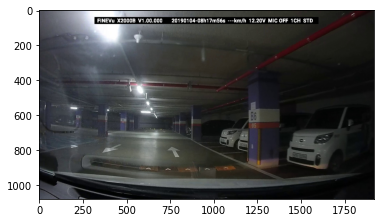

/aiffel/aiffel/socar_open_set/data/train/atower_b5/b5_2.mp4_frame385.jpg
size: (1920, 1080, ('R', 'G', 'B'))


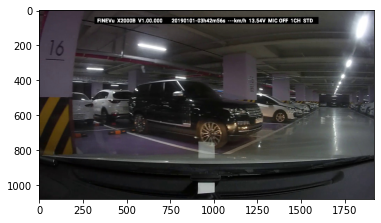

/aiffel/aiffel/socar_open_set/data/train/dcube_b6/20190104-09h17m17s_F_N.mp4_frame482.jpg
size: (1920, 1080, ('R', 'G', 'B'))


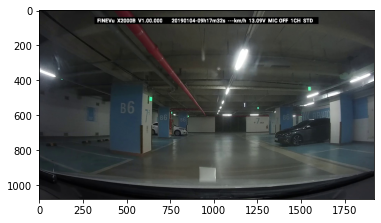

/aiffel/aiffel/socar_open_set/data/train/balsan_b5/20190104-08h20m55s_F_N.mp4_frame976.jpg
size: (1920, 1080, ('R', 'G', 'B'))


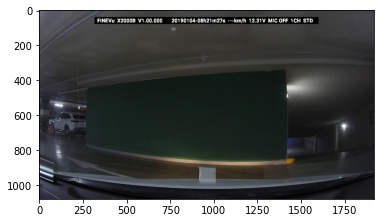

In [3]:
for dirpath, dirnames, filenames in os.walk(TRAIN_PATH):
    for i, filename in enumerate(filenames):
        print(os.path.join(dirpath, filename)) # 파일이름을 출력합니다
        image = Image.open(os.path.join(dirpath, filename), 'r')
        print(f'size: ({image.width}, {image.height}, {image.getbands()})') # 이미지 정보를 출력합니다
        plt.imshow(image)
        plt.show()
        break # 폴더마다 1장만 출력합니다

이어서 오위치 이미지는 어떤 것들이 있는지 확인해 봅시다. 오위치 이미지 5장을 출력하는 코드를 작성해 보세요.

In [4]:
# 오위치 REJECT_PATH에 들어있는데요, 폴더 구조가 약간 다릅니다.
# 하지만 작성할 수 있을거에요!!
# 정위치 이미지 코드를 참고해서 작성해보세요~!
# [[ Your Code ]]

예시 코드

```
for dirpath, dirnames, filenames in os.walk(REJECT_PATH):
    for i, filename in enumerate(filenames):
        if i > 4:
            break
        print(os.path.join(dirpath, filename))
        image = Image.open(os.path.join(dirpath, filename), 'r')
        print(f'size: ({image.width}, {image.height}, {image.getbands()})')
        plt.imshow(image)
        plt.show()
```

### 데이터 전처리 파이프라인

___

모델을 학습시키기 위한 데이터셋을 준비하고, 이 데이터셋을 전처리 하기 위한 함수를 작성할 거예요.

`torchvision`에 `transforms`로 자주 사용되는 전처리 함수들이 제공되고 있기 때문에 모든 전처리 함수를 직접 작성하지 않아도 됩니다. 아래 링크에 들어가면 자세한 설명을 볼 수 있습니다.

-   [TORCHVISION.TRANSFORMS](https://pytorch.org/vision/stable/transforms.html)

모델에 입력할 이미지 크기는 224x224로 결정할게요. 전체 이미지 크기가 1,000을 넘어가니 바로 `CenterCrop`을 하면 안될 것 같네요. 적당히 `Resize`를 한 후 `CenterCrop`을 적용합니다. 그 외에도 다른 augmentation기법을 추가해 `create_dataloader`를 만들어 데이터셋 파이프라인을 설치합니다.

PyTorch에서는 여러 augmentation 기법을 연달아 적용시킬 수 있도록 `torchvision.transforms.Compose`를 사용합니다. 텐서플로우에서는 `tf.keras.Sequential`이나 `Dataset.map`를 사용했던 것 기억나시나요? 두 참고자료를 읽어보면 약간 다르다는 것을 알 수 있습니다.

-   [torchvision.transforms.Compose](https://pytorch.org/vision/stable/transforms.html#compositions-of-transforms)
-   [keras: Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation)

In [5]:
def create_dataloader(path, batch_size, istrain):
    nearest_mode = torchvision.transforms.InterpolationMode.NEAREST
    normalize = torchvision.transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
    )
    train_transformer = torchvision.transforms.Compose([
        torchvision.transforms.Resize((320,320), interpolation=nearest_mode),
        torchvision.transforms.CenterCrop((224,224)),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomVerticalFlip(),
        torchvision.transforms.ColorJitter(),
        torchvision.transforms.ToTensor(),
        normalize
    ])

    test_transformer = torchvision.transforms.Compose([
        torchvision.transforms.Resize((320,320), interpolation=nearest_mode),
        torchvision.transforms.CenterCrop((224,224)),
        torchvision.transforms.ToTensor(),
        normalize
    ])
    
    if istrain:
        data = torchvision.datasets.ImageFolder(path, transform=train_transformer)
        dataloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
        
    else:
        data = torchvision.datasets.ImageFolder(path, transform=test_transformer)
        dataloader = torch.utils.data.DataLoader(data, shuffle=False)

    return dataloader, data

print('슝=3')

슝=3


위에서 만든 함수를 이용해 데이터셋을 준비합니다. 먼저 train 데이터셋을 준비해 봅니다.

In [6]:
BATCH_SIZE = 64

train_loader, _train_data = create_dataloader(TRAIN_PATH, BATCH_SIZE, True)
target_class_num = len(os.listdir(os.path.join(TRAIN_PATH)))

print('target_class_num: ', target_class_num)
print('train: ', _train_data.class_to_idx)

target_class_num:  4
train:  {'atower_b5': 0, 'balsan_b5': 1, 'balsan_b6': 2, 'dcube_b6': 3}


폴더 구조와 비교해 봅시다.

```bash
└──train : 훈련용 정위치 이미지
    ├──atower_b5 
    ├──balsan_b5
    ├──balsan_b6
    └──dcube_b6
```

`train`폴더 안의 네 개의 폴더 `atower_b5`, `balsan_b5`, `balsan_b6`, `dcube_b6`가 각각의 클래스로 변환되었고 차례대로 index가 붙었네요.

여기까지 확인했다면 무언가가 더 궁금하지 않으신가요?! 바로 각 클래스에 이미지가 몇 개나 있을지 확인해 봐야 합니다. 클래스당 데이터 개수가 일정하지 않다면 문제가 될 수 있으니까요!

In [7]:
# 이곳을 이용해 아래 퀴즈를 풀어보세요!
# for ... in os.walk(TRAIN_PATH)를 응용해 보세요.

예시 코드

```
for dirpath, dirnames, filenames in os.walk(TRAIN_PATH):
    print(f'{dirpath} : {len(filenames)}')

```

Q4. 훈련 데이터의 각각의 클래스에는 몇 장의 이미지가 들어있나요?

예시답안

예시답안

각각 1,250장

동일한 방법으로 test 데이터셋을 준비해 봅시다. test 용 데이터는 `TEST_PATH`에 들어 있습니다. 그리고 섞지 않을테니 `shuffle` 값을 다르게 주어야 겠죠?

In [8]:
# TEST_PATH에 들어있는 데이터를 shuffle 하지 않도록 dataloader를 만들어주세요.
test_loader, _test_data = # [[ Your Code ]] 
print('test: ', _test_data.class_to_idx)

SyntaxError: invalid syntax (3471652138.py, line 2)

예시코드

```
test_loader, _test_data = create_dataloader(TEST_PATH, BATCH_SIZE, False)
print('test: ', _test_data.class_to_idx)

```

역시 폴더 구조와 한 번 비교를 해봅시다! 스스로 해보세요~!

그리고 아까처럼 각 클래스마다 몇 장의 이미지가 있는지도 확인해 봅시다.

In [ ]:
# 이제 힌트가 없어도 되겠죠?
# [[ Your Code ]]

이걸 누르지 말고 혼자 힘으로!! 뭐 모를수도 있긴 하죠. 😝

```
for dirpath, dirnames, filenames in os.walk(TEST_PATH):
    print(f'{dirpath} : {len(filenames)}')

```

데이터가 준비가 되었다면 이제 모델을 학습시키러 가볼까요~?

# 15-5. 모델 훈련

이제 데이터가 준비 되었으니 모델을 만들고 학습을 시켜봅시다.

모델이 학습하는 구조는 아래와 같을 거예요.

```bash
for epoch in range(epochs):
  모델_훈련(train_data)
  모델_정확도_계산(test_data)
  if 모델 정확도가 커졌다면:
    좋은 모델이므로 중간 저장
```

각 단계를 분리해서 함수로 만들어 봅시다.

### Metric 함수

___

모델의 정확도를 측정할 때 사용할 metric 함수를 만듭니다. metric에는 `accuray_score`, `f1_score`, `precision_score`, `recall_score`를 사용합니다. 모두 `sklearn.metrics`에 준비되어 있는 함수로군요!

In [ ]:
def calculate_metrics(trues, preds):
    accuracy = accuracy_score(trues, preds)
    f1 = f1_score(trues, preds, average='macro')
    precision = precision_score(trues, preds, average='macro')
    recall = recall_score(trues, preds, average='macro')
    return accuracy, f1, precision, recall

print('슝=3')

### Train 함수

___

1 epoch 당 1회 수행되는 `train` 함수를 만듭니다.

이 함수가 모델을 학습시키는 역할을 해야 하므로 optimizer로 `Adam`을 사용했어요. `Adam`외에도 다양한 opimizer들이 있습니다.

-   [TORCH.OPTIM](https://pytorch.org/docs/stable/optim.html)

또 한 가지 중요한 것은 loss 함수인데요. `CrossEntropyLoss`를 사용하고 `loss.backward()`라는 함수를 사용할 거예요. backward라니 backpropagation인 것 같군요!

-   [Torch Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
-   [What does the backward() function do?](https://discuss.pytorch.org/t/what-does-the-backward-function-do/9944/5)
-   [How are optimizer.step() and loss.backward() related?](https://discuss.pytorch.org/t/how-are-optimizer-step-and-loss-backward-related/7350)

위 참고 자료를 종합하니 생각했던 것과는 약간 다르네요~!

`loss.backward()`에서는 gradient를 계산만 하고 `optimizer.step()`에서 파라미터 업데이트를 하는군요. `optimizer.zero_grad()`의 역할도 있네요. 이전에 적용된 gradient를 초기화해서 gradient들이 중복으로 계산되는 것을 막아줍니다.

이런 순서에 주의해서 코드를 작성해 봅시다.

In [ ]:
def train(dataloader, net, learning_rate, weight_decay_level, device):
    
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(
        net.parameters(),
        lr = learning_rate, 
        weight_decay = weight_decay_level
    )

    net.train()

    train_losses = list()
    train_preds = list()
    train_trues = list()

    for idx, (img, label) in enumerate(dataloader):

        img = img.to(device)
        label = label.to(device)
        
        optimizer.zero_grad()

        out = net(img)

        _, pred = torch.max(out, 1)
        loss = criterion(out, label)

        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
        train_trues.extend(label.view(-1).cpu().numpy().tolist())
        train_preds.extend(pred.view(-1).cpu().detach().numpy().tolist())

    acc, f1, prec, rec = calculate_metrics(train_trues, train_preds)

    print('\n''====== Training Metrics ======')
    print('Loss: ', mean(train_losses))
    print('Acc: ', acc)
    print('F1: ', f1)
    print('Precision: ', prec)
    print('Recall: ', rec)
    print(confusion_matrix(train_trues, train_preds))

    return net, acc, f1, prec, rec

print('슝=3')

### Test 함수

___

`test`함수에서는 모델을 훈련시키는 것이 아니라 test 데이터로 모델을 평가만 하면 되니 `train`함수보다는 복잡하지 않아요. 편안한 마음으로 만들어 봅시다.

그런데 이번에는 `net.eval()`함수를 한 번 사용해야 합니다. `eval()`함수의 의미는 무엇일까요?

-   [What does model.eval() do in pytorch?](https://stackoverflow.com/questions/60018578/what-does-model-eval-do-in-pytorch)

`train`함수에서 그냥 지나쳤던 `net.train()`과 관련이 있네요. 학습을 진행할 때와 아닐 때의 모델의 상태를 변환시켜주는 함수였네요!

PyTorch에서 모델은 `train()`을 통해 training이 가능한 상태가 되었다가, `eval()`을 통해 evaluating이 가능한 상태가 됩니다.

이제 함수를 작성해보죠.

In [ ]:
def test(dataloader, net, device):

    criterion = torch.nn.CrossEntropyLoss()
    
    net.eval()
    test_losses = list()
    test_trues = list()
    test_preds = list()
    
    with torch.no_grad():
        for idx, (img, label) in enumerate(dataloader):

            img = img.to(device)
            label = label.to(device)

            out = net(img)

            _, pred = torch.max(out, 1)
            loss = criterion(out, label)

            test_losses.append(loss.item())
            test_trues.extend(label.view(-1).cpu().numpy().tolist())
            test_preds.extend(pred.view(-1).cpu().detach().numpy().tolist())

    acc, f1, prec, rec = calculate_metrics(test_trues, test_preds)

    print('====== Test Metrics ======')
    print('Test Loss: ', mean(test_losses))
    print('Test Acc: ', acc)
    print('Test F1: ', f1)
    print('Test Precision: ', prec)
    print('Test Recall: ', rec)
    print(confusion_matrix(test_trues, test_preds))

    return net, acc, f1, prec, rec

print('슝=3')

### 학습을 위한 함수

___

이제 모델을 학습시킬 수 있도록 최종 함수를 작성합니다. **훈련-평가-저장**이 반복되는 구조일뿐 나머지는 폴더를 만들고 가장 좋은 accuracy를 저장하는 등의 부차적인 코드네요.

In [ ]:
def train_classifier(net, train_loader, test_loader, n_epochs, learning_rate, weight_decay, device):
    best_test_acc = 0
    
    model_save_path = None
    model_save_base = 'weights'
    if not os.path.exists(model_save_base):
        os.makedirs(model_save_base)
    
    print('>> Start Training Model!')
    for epoch in range(n_epochs):
        
        print('> epoch: ', epoch)

        net, _, _, _, _ = train(train_loader, net, learning_rate, weight_decay, device)
        net, test_acc, _, _, _  = test(test_loader, net, device)

        if test_acc > best_test_acc:

            best_test_acc = test_acc
            test_acc_str = '%.5f' % test_acc

            print('[Notification] Best Model Updated!')
            model_save_path = os.path.join(model_save_base, 'classifier_acc_' + str(test_acc_str) + '.pth') 
            torch.save(net.state_dict(), model_save_path)
                
    return model_save_path

print('슝=3')

### 모델 학습

___

이제 모델을 생성합니다. 모델은 많이 사용되는 `resnet50`을 사용합니다. pretrain된 모델로 불러와 전이 학습을 적용할게요.

In [ ]:
net = torchvision.models.resnet50(pretrained=True)
net.fc = torch.nn.Linear(
    net.fc.in_features,
    target_class_num
)

net.to(device)

모델이 준비 되었다면 학습을 시작합니다. 학습이 오래 걸리기 때문에 1epoch만 수행하고 준비된 모델을 이용할게요. (사실 1epoch도 꽤나 걸립니다. 🙄)

In [ ]:
EPOCHS = 1
LEARNING_RATE = 0.005
WEIGHT_DECAY = 0.0005

saved_weight_path = train_classifier(net, train_loader, test_loader, EPOCHS, LEARNING_RATE, WEIGHT_DECAY, device)

더 오래 학습시킨 모델이 뒤에 제공되니 다음으로 넘어갑니다.

# 15-6. Confidence

미리 준비한 모델을 불러옵니다. 20 epochs를 학습시킨 모델입니다.

In [ ]:
saved_weight_path = os.path.join(MODEL_PATH, 'classifier_acc_0.96008.pth')

net = torchvision.models.resnet50(pretrained=True)
net.fc = torch.nn.Linear(
    net.fc.in_features,
    target_class_num
)

net.load_state_dict(torch.load(saved_weight_path, map_location=device))
net.eval()
net.to(device)    

print('Successfully Loaded the Network Weight!')

### Confidence 추출

___

Confidence를 확인할 함수를 만듭시다.

Confidence를 확인하는 방법으로 softmax와 entropy를 추출해 보기로 한 것 기억나시죠? softmax 값 중에 가장 높은 softmax값을 추출하고 entropy는 아래 entropy식을 참고해 코드를 만들어 봅시다.

entropy\=−∑(P(A)log2P(A))

In [ ]:
def get_confidence(net, infer_loader, device):    
    container = list()
    
    with torch.no_grad():
        for idx, (img, label) in enumerate(infer_loader):
            img = img.to(device)
            label = label.to(device)
            out = net(img) 
            out_softmax = torch.softmax(out, 1)

            msp = float(out_softmax.detach().cpu().numpy().max()) # 최대 softmax 값

            pA = out_softmax.detach().cpu().numpy() / out_softmax.detach().cpu().numpy().sum()
            entropy = -np.sum( pA * np.log2(pA))

            fname, _ = infer_loader.dataset.samples[idx]
            label = int(label.detach().cpu().numpy())

            tmp_container = {
                'fname':fname,
                'label':label,
                'msp':msp,
                'entropy':entropy
            }
            container.append(tmp_container)
        
    return container

print('슝=3')

이제 모든 준비가 끝났습니다. 정위치 데이터의 confidence를 구해봅시다. 확인할 정위치 데이터로는 test 이미지를 사용할게요.

In [ ]:
test_loader, _test_data = create_dataloader(TEST_PATH, 1, False)
print('Test: ', _test_data.class_to_idx)

test_result = get_confidence(net, test_loader, device)
print(test_result[0])

동일하게 오위치 데이터의 confidence를 구해봅시다. 오위치 데이터는 `REJECT_PATH`에 있습니다.

In [ ]:
# 직접 코드를 작성해 보세요
reject_loader, _reject_data = # [[ Your Code ]]
print('Reject: ', _reject_data.class_to_idx)

reject_result = # [[ Your Code ]]
print(reject_result[0])

예시 코드

```
reject_loader, _reject_data = create_dataloader(REJECT_PATH, 1, False)
print('Reject: ', _reject_data.class_to_idx)

reject_result = get_confidence(net, reject_loader, device)
print(reject_result[0])

```

### 시각화

___

추출해 낸 confidence를 시각화 해봅시다. 우선 최대 softmax와 entropy를 따로 떼어냅니다.

In [ ]:
def parse_result(results):
    msp, entropy = list(), list()
    for result in results:
        msp.append(result['msp'])
        entropy.append(result['entropy'])
    return msp, entropy

test_msp, test_entropy = parse_result(test_result)
reject_msp, reject_entropy = parse_result(reject_result)

print('슝=3')

최대 Softmax 분포를 시각화 해봅니다.

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(test_msp, label='Test', color='orange')
sns.histplot(reject_msp, label='Reject', color='teal')
plt.legend(fontsize=15)
plt.show()

Entropy 분포를 시각화 해봅니다. 위 코드를 활용해서 직접 작성해 보세요~!

In [ ]:
# [[ Your Code ]]

예시 코드

```
plt.figure(figsize=(12,5))
sns.histplot(test_entropy, label='Test', color='orange')
sns.histplot(reject_entropy, label='Reject', color='teal')
plt.legend(fontsize=15)
plt.show()

```

어떤가요? 오위치의 모든 데이터는 분류하지 않아야 하는 값입니다. 그러므로 최대 softmax가 1에 가깝지 않아야 하고, entropy가 높아야 합니다. 하지만 결과를 보면 최대 softmax는 1을 중심으로 퍼져있고, entropy도 0을 중심으로 퍼져있는 모양이네요.

예상과는 조금 다른 결과입니다.

Q4. 만약 모델이 오위치 이미지를 완벽하게 분류하지 못하는 이상적인 상황이라면 위 softmax와 entropy 분포는 어떤 모양을 보였을까요?

예시답안

예시답안

Softmax 분포는 0.25에 집중되어 있고, entropy분포는 2에 집중되어 있게 됩니다.

❓왜 그런거죠❓ Softmax의 합은 1입니다. 클래스가 4개이니 최대 softmax값이 0.25보다 작을 수 없습니다. 만약 0.25보다 작은 softmax값이 생기면 적어도 하나의 다른 softmax값이 0.25보다 크게 되어 최대 softmax가 0.25보다 크게 됩니다. 완벽하게 분류가 안되는 이상적인 상황에서는 모든 softmax 값이 0.25가 되고, 최대 softmax값도 0.25가 됩니다.  
클래스가 4개일 때 Entropy의 최대값은 2입니다. 모든 클래스의 확률이 0.25로 같을 때 entropy가 최대가 되는데, entropy식을 이용해 계산하면 2가 됩니다. P(A)에 0.25를 넣어 계산해 보세요~!


# 15-7. Open Set Recognition

앞서 진행한 과정을 살펴보면 다음과 같습니다.

1.  모델을 정위치 이미지로만 학습
2.  정위치 이미지로만 학습했으므로 오위치 이미지에 대해 낮은 confidence를 예상
3.  모델에 오위치 이미지를 입력
4.  모델이 오위치 이미지에 높은 confidence를 보임

우리가 예상한 대로 흘러가지 않는군요!!

### Open Set Recognition의 개요

___

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/so-6-l-6-1.max-800x600.jpg)[https://www.wjscheirer.com/projects/openset-recognition/](https://www.wjscheirer.com/projects/openset-recognition/)

지금과 같은 유사한 상황을 해결하기 위해 제안된 주제가 Open Set Recognition인데요. 일반적인 분류 문제에 학습시키는 데이터가 Closed Set이었다는 것과 대비됩니다.

> 💠 Closed Set Recognition  
> 일반적인 분류 문제로, input을 넣으면 정해진 class의 output으로 mapping할 수 있습니다. 또한 학습 후에는 학습 전에 정해놓은 class에 포함되지 않은 이미지를 추가하거나 제거할 수 없습니다.

일반적인 분류 문제에서는 100가지의 클래스를 학습시키면 모델은 100가지 물체만 존재하는 세상에 살게 됩니다. 101번째 물건은 존재할 수 없습니다. 그래서 100가지 클래스 중 하나를 맞추게 되죠.

하지만 실제 세상은 그렇지 않습니다. 세상에는 많은 것들이 존재하고 그 종류를 논하자면 과연 끝이 있을까 싶을 정도이죠. 이렇게 Closed Set 세상의 모델을 Open Set인 실제 세계에 적용하려면 어떻게 해야 할까요?

예를 들어 봅시다. 한 꼬마가 있습니다. 꼬마는 `아빠`, `엄마`, `할아버지`, `할머니`를 알고 있습니다. 이때 이상한 사람을 따라가면 안 된다고 가르치려고 합니다. 과연 `이상한 사람`을 어떻게 가르쳐야 할까요?

꼬마가 처음 보는 `아빠 친구`를 가리켜 `이상한 사람`이라고 가르칠 수 있습니다. 꼬마는 `아빠 친구`는 `아빠`와 다르다는 걸 알았습니다. 이제 `아빠 친구`는 `이상한 사람`으로 분류됩니다. 그런데 `아빠 친구`만 `이상한 사람`이기를 바라는 것이 아니죠. 조금 더 많은 예시가 필요합니다. 이제 `엄마 친구`를 데려와 `이상한 사람`이라고 가르칩니다. 그런데 이런 식으로 가르친다면 얼마나 많은 사람을 데려와 `이상한 사람` 범주에 넣어줘야 할까요?

또한 이렇게 가르치는 이유가 `아빠 친구`와 `엄마 친구`가 진짜 `이상한 사람`이어서가 아닙니다. 알지 못하는 사람을 `이상한 사람`으로 분류하기를 바라는 것입니다. 꼬마가 `이상한 사람`을 학습하기 위해서는 **아는 사람이 아니라면 이상한 사람**이라는 점을 깨우쳐야 합니다.

우리가 학습시킨 모델도 마찬가지이겠죠. **아는 클래스가 아니면 모르는 클래스**라는 것을 깨우치게 만들어야 합니다. 이런 상황이 Open Set Recognition이 해결하고자 하는 것과 비슷합니다.

-   [Introduction to the Open Set Recognition Problem](https://www.youtube.com/watch?v=4vvaqPzBlSM)
-   [Open Set Recognition with Background Data](https://youtu.be/aajoR-lX6ak)

Closed Set인 실험실을 떠난 모델이 진짜 세상에서 만난 문제는 하나로 규정하기가 어렵습니다. 그래서 Open Set Recognition과 닮은 연구 주제들이 여럿 있습니다.

[여기](https://github.com/iCGY96/awesome_OpenSetRecognition_list)를 참고하면 매우 다양한 연구들이 얽혀 있는 것을 볼 수 있는데요. 딥러닝 기반의 해결법, 전통적인 머신러닝 기반의 해결법, 순수 이론적인 Open Set 학습 이론, 이상 탐지 문제, Zero-shot Learning, One-shot Learning, Few-shot Learning, Open world Recognition 등 정말 많은 연구들을 볼 수 있습니다.

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/so-6-l-6-2.max-800x600.png)

\[다양한 Known과 Unknown들, 그리고 수많은 방법들\]

[https://arxiv.org/pdf/1811.08581.pdf](https://arxiv.org/pdf/1811.08581.pdf)

다양한 연구 주제를 가르는 대표적인 기준으로는 **모르는 것에 대한 구분**이 있습니다.

`모른다`는 것은 두 가지로 나눌 수 있습니다. `아는 모름(Known unknown)`과 `모르는 모름(Unknown unknown)`입니다. 위에 적은 꼬마의 예에서 `이상한 사람`을 모름이라고 규정할 때, `아빠 친구`와 `엄마 친구`는 `아는 모름`입니다. 그 둘을 `모른다`고 가르쳤기 때문이죠. 하지만 꼬마가 아직 만나지 못한 수많은 사람들은 `모르는 모름`입니다.

`아는 앎(known known)`과 `모르는 앎(unknown known)`도 있습니다. 보통의 이미지 분류에서 훈련 데이터와 테스트 데이터에 있는 이미지는 `아는 앎`이 됩니다. 일반적인 분류는 `아는 앎`을 통해 또 다른`아는 앎`을 구분하는 과정이라고 할 수 있겠어요.

하지만 `모르는 앎`은 다릅니다. 학습시키지 않아도 알 수 있는 데이터를 가리킵니다. 다양한 사진 중에서 서로 같은 사람의 사진이라고 판단하는 문제에서 모델은 모든 사진을 학습하지 않습니다. 우선 학습에 사용된 사진은 `아는 앎`이 됩니다. 하지만 훈련을 마치고 처음 보는 사진들에서도 같은 사람의 사진을 구분해내는 능력이 갖추었을 때, 처음 보는 사진들은 `모르는 앎`이 됩니다. Zero-shot learning과 같은 분야는 `아는 앎`을 통해 `모르는 앎`을 구분하는 과정이라고 할 수 있죠.

`모른다`를 가르치는 것은 조금 다른 문제입니다. 아는 것에 비교했을 때, 종류나 개수와 같은 데이터의 특성이 다르기 때문이죠. 위 꼬마의 예에서 `아빠 친구`와 `엄마 친구`를 `모른다`의 학습 데이터로 써버린다면, `아빠 친구` 클래스와 `엄마 친구` 클래스를 포기해야 하는 문제가 있습니다.

또 `아는 모름`에 해당하는 데이터가 많지 않거나 전혀 없을 때도 있습니다. 그래서 `아는 모름`을 통해 문제를 해결하고자 하는 경우는 잘 보이지 않습니다. 보통 `아는 앎`을 통해 `모르는 모름`을 해결하려고 하고 일반적으로 **Open Set/Open World 문제**로 불립니다.

일반적인 이미지 분류 문제가 상당히 해결된 지금은 이 문제들이 더 활발하게 연구되고 있습니다.

# 15-8. 마무리하며

지금까지 쏘카의 정위치 주차 판별 문제를 해결하기 위한 방안을 고민해 봤습니다.

먼저 분류(Classification)와 이상 탐지(Anomaly detection) 방법 중 분류를 통해 문제를 해결할 수 있을지 생각해 봤습니다. 하지만 우리가 생각했던 것과 다르게 오위치 데이터에 대해서도 confidence가 높게 나오면서 다른 접근법이 필요하다는 것을 알았죠.

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/so-6-l-7-1.max-800x600.png)

\[Open Set Recognition\]

[https://arxiv.org/pdf/2004.02434v3.pdf](https://arxiv.org/pdf/2004.02434v3.pdf)

그래서 실제 세상에서 인공지능을 활용할 수 있는 Open Set Recogntion이라는 분야에 대해 살짝 알아봤습니다. 또한 Open Set Recognition외에도 다양한 방법들이 실제 세상의 문제를 풀기 위해 존재한다는 점도 짚어 봤습니다.

이제 앞으로 Open Set Recognition 분야에서 딥러닝 모델이 사용된 초기 방법 중 하나인 OpenMax라는 방법을 사용해 볼 것입니다. OpenMax에서는 `아는 앎`을 통해 `모르는 모름`을 알아낼 수 있는 방법을 제안합니다. 과연 OpenMax가 쏘카의 정위치 주차 문제를 해결하는데 얼마나 도움이 될까요? 다음 시간에 알아보도록 합시다~!